In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("../datasets/bird_clash.csv")
df.shape

(463, 8)

In [3]:
df.head()

,ECOLI_LOG10,TURB_NTRU,RHUM_PCT,WTEMP_CEL,BIRDS_NO,CHANGELL_FT,AirportWindSpInst_mph,AirportRain48W_in
0,0.6021,9.8100,79,15.44,0,-0.131,6,0.075
1,0.3010,3.2550,91,10.56,5,-0.014,0,0.000
2,0.3010,1.8950,73,16.83,0,0.125,6,0.000
3,0.3010,1.9725,42,9.22,0,-0.026,14,0.000
4,1.0792,3.1425,64,10.56,1,0.016,14,0.000


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

ECOLI_LOG10              0
TURB_NTRU                0
RHUM_PCT                 0
WTEMP_CEL                0
BIRDS_NO                 0
CHANGELL_FT              0
AirportWindSpInst_mph    0
AirportRain48W_in        0
dtype: int64

In [6]:
df.skew(numeric_only=True)

ECOLI_LOG10             -0.167250
TURB_NTRU                4.557769
RHUM_PCT                 3.658335
WTEMP_CEL               -0.899247
BIRDS_NO                 1.879290
CHANGELL_FT             -0.134574
AirportWindSpInst_mph    0.020716
AirportRain48W_in        7.146981
dtype: float64

In [7]:
col_head=[]
print(df.columns)
for col in df.columns:
    col_head.append(col)
        

Index(['ECOLI_LOG10', 'TURB_NTRU', 'RHUM_PCT', 'WTEMP_CEL', 'BIRDS_NO',
       'CHANGELL_FT', 'AirportWindSpInst_mph', 'AirportRain48W_in'],
      dtype='object')


In [8]:
threshold = 0.96
thresh = df['TURB_NTRU'].quantile(threshold)
df['TURB_NTRU'][df['TURB_NTRU']>thresh]=thresh
df['TURB_NTRU'].skew()
threshold2 = 0.998
thresh2 = df['RHUM_PCT'].quantile(threshold2)
df['RHUM_PCT'][df['RHUM_PCT']>thresh2]=thresh2
df['RHUM_PCT'].skew()
threshold3 = 0.96
thresh3 = df['BIRDS_NO'].quantile(threshold3)
df['BIRDS_NO'][df['BIRDS_NO']>thresh3]=thresh3
df['BIRDS_NO'].skew()
# threshold4 = 0.99
# thresh4 = df['CHANGELL_FT'].quantile(threshold4)
# df['CHANGELL_FT'][df['CHANGELL_FT']>thresh4]=thresh4
# df['CHANGELL_FT'].skew()
threshold5 = 0.92
thresh5 = df['AirportRain48W_in'].quantile(threshold5)
df['AirportRain48W_in'][df['AirportRain48W_in']>thresh5]=thresh5
df.skew()

C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_17164\2749270919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TURB_NTRU'][df['TURB_NTRU']>thresh]=thresh
C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_17164\2749270919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RHUM_PCT'][df['RHUM_PCT']>thresh2]=thresh2
C:\Users\Vikram k m\AppData\Local\Temp\ipykernel_17164\2749270919.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '121.05600000000231' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

ECOLI_LOG10             -0.167250
TURB_NTRU                2.077294
RHUM_PCT                 0.040954
WTEMP_CEL               -0.899247
BIRDS_NO                 1.229452
CHANGELL_FT             -0.134574
AirportWindSpInst_mph    0.020716
AirportRain48W_in        1.347081
dtype: float64

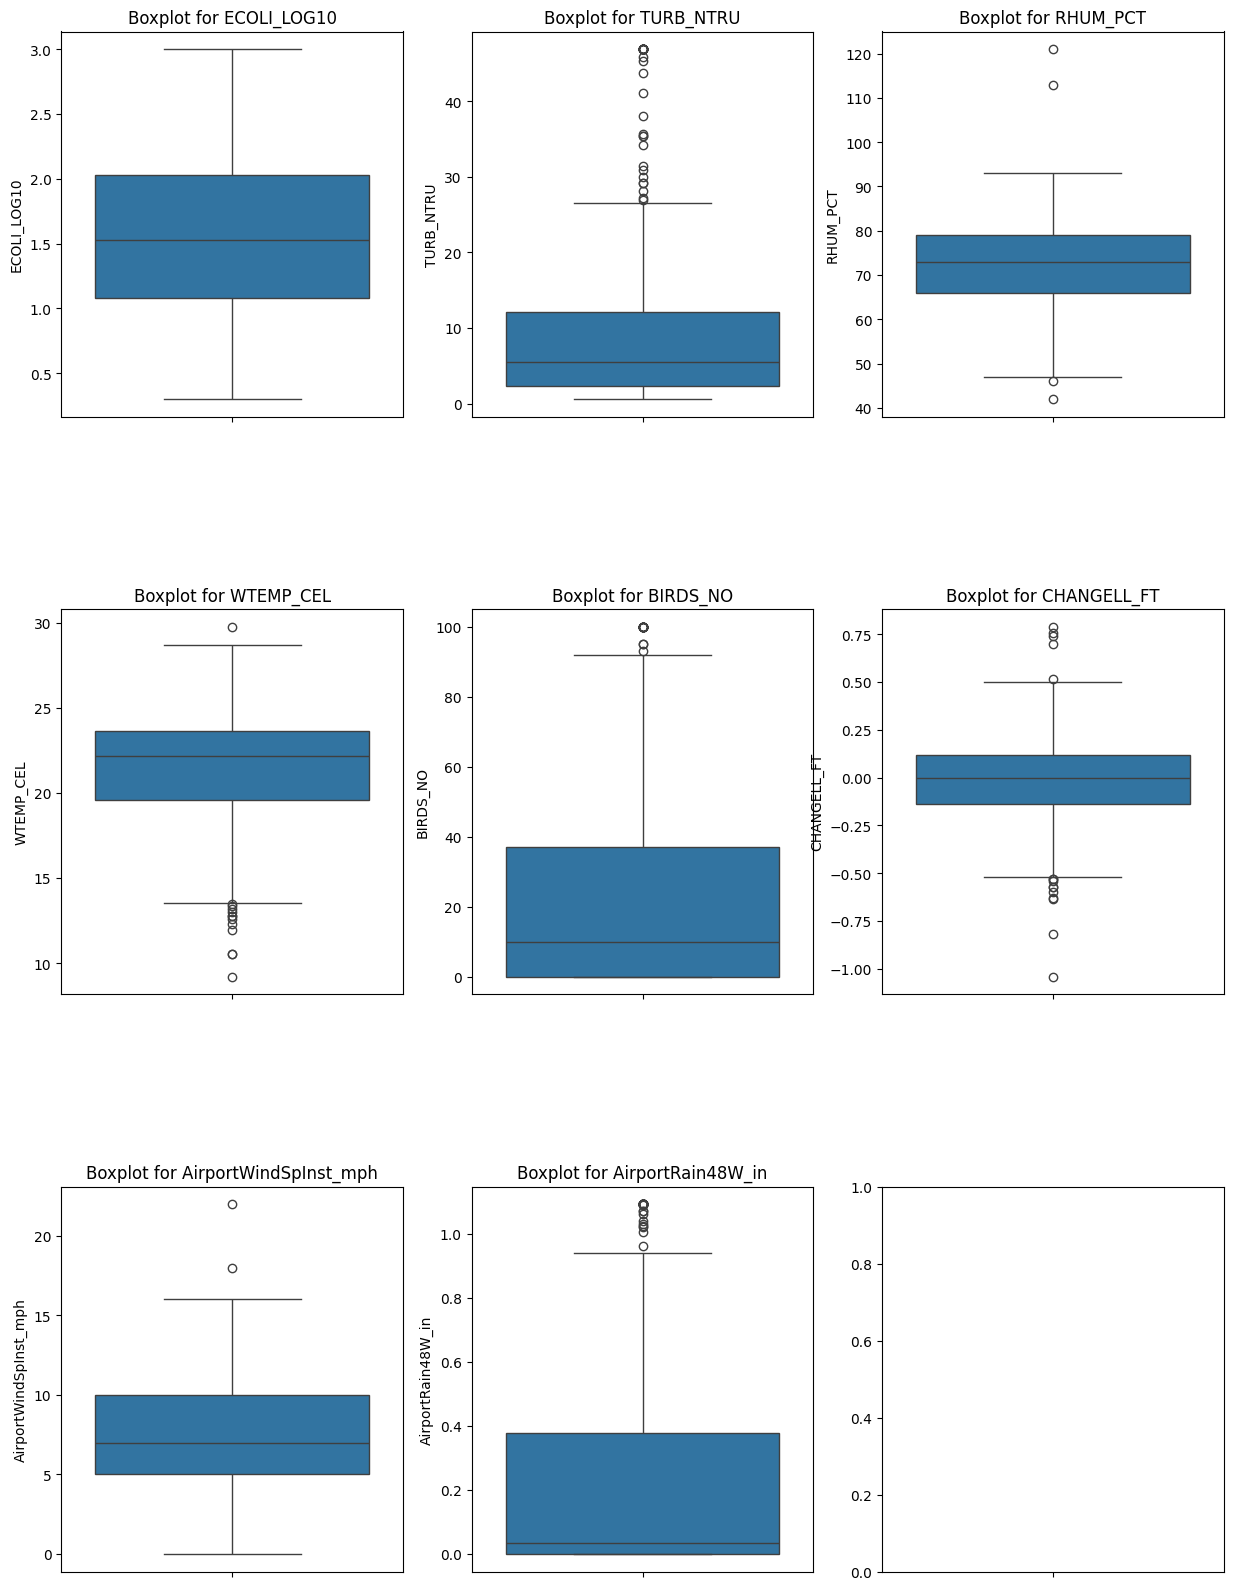

In [15]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 20), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, i+1)
    sn.boxplot(y = df[col])
    ax.set_title(f"Boxplot for {col}")
plt.show()

# Feature

In [10]:
df.columns

Index(['ECOLI_LOG10', 'TURB_NTRU', 'RHUM_PCT', 'WTEMP_CEL', 'BIRDS_NO',
       'CHANGELL_FT', 'AirportWindSpInst_mph', 'AirportRain48W_in'],
      dtype='object')

In [11]:
colhead=[]
for col in df.columns:
    colhead.append(col)
colhead.remove('ECOLI_LOG10')
colhead

['TURB_NTRU',
 'RHUM_PCT',
 'WTEMP_CEL',
 'BIRDS_NO',
 'CHANGELL_FT',
 'AirportWindSpInst_mph',
 'AirportRain48W_in']

In [12]:
for col in colhead:
    fig=px.histogram(df,x=col)
    fig.show()

In [13]:
for col in colhead:
    fig = px.scatter(df, x=col, y=df['ECOLI_LOG10'])
    fig.show()

In [16]:
fif2=px.scatter(df,x='age',y='charges',color='smoker',width=1000)
fif2.show()

KeyError: 'charges'

<Figure size 1000x500 with 0 Axes>